<a href="https://colab.research.google.com/github/luisfranc123/Tutorials_Statistics_Numerical_Analysis/blob/main/Numerical_Methods/Chapter15_Eigen_Values_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**15. EIGENVALUES AND EIGENVECTORS**
---
**Textbook**: Python Programming and Numerical Methods

####**15.1 Eigenvalues and Eigenvectors Problem Statement**

We learned from the previous chapter that matrix $A$ applied to a column vector $x$, that is, $Ax$, is a linear transformation of $x$. There is a special tranform in the following for:

$$Ax = \lambda\space{x},$$

where $A$ is an $n×n$ matrix, $x$ is an $n×1$ column vector $(x\neq0)$, and $\lambda$ is a scalar. Any $\lambda$ that satisfies the above equation is known as an **eigenvalue** of the matrix $A$, while the associated vector $x$ is called an **eigenvector** corresponding to $\lambda$.   

The motivation behind eigenvalues and eigenvectors is that if we understand the characteristics of the linear transformation, it will help simplify the solutions to our problem. Say, we can multiply a vector $A$ to another vector $x$, i.e., $Ax$. It essentially transforms the vector $x$ into another vector, whereby the transformation represents a scale of the length of the vector and/or the rotation of the vector. The above equation points out that for some vectors, the effect of transformation $Ax$ is only scaling (stretching, compressing, and ﬂipping). The **eigenvectors** are the vectors having this property and the **eigenvalues** $\lambda$ are the scale factors. Let us look at the following example.

**Try it!** Plot the vector $x = [[1], [1]]$ and the vector $b = Ax$ where $A = [[2, 0], [0, 1]]$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(plt.style.available[9])
#plt.style.use("seaborn-v0_8-paper")
def plot_vect(x, b, xlim, ylim):
  """
  Function to plot two vectors,
  x - the original vector
  b - the transformed vectors
  xlim - the limit for x
  ylim - the limit for y
  """

  plt.figure(figsize =(10, 6))
  plt.quiver(0, 0, x[0], x[1], \
             color = "k", angles = "xy", \
             scale_units = "xy", scale = 1, \
             label = "Original Vector")
  plt.quiver(0, 0, b[0], b[1],\
            color="g",angles="xy",\
            scale_units="xy",scale=1,\
            label ="Transformed Vector")
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.legend()
  plt.show()

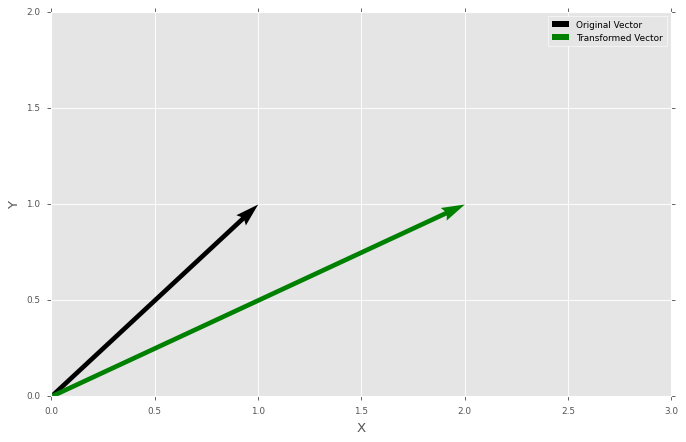

In [ ]:
A = np.array([[2, 0], [0, 1]])

x = np.array([[1], [1]])
b = np.dot(A, x)
plot_vect(x, b, (0, 3), (0, 2))

We can see from the generated figure that the original vector $x$ is rotated and stretched longer after being transformed by $A$. The vector $[[1], [1]]$ is transformed to $[[2], [1]]$.

**Try it**: Plot the vector $x = [[1], [0]]$ and the vector $b = Ax$ where $A = [[2, 0], [0, 1]]$

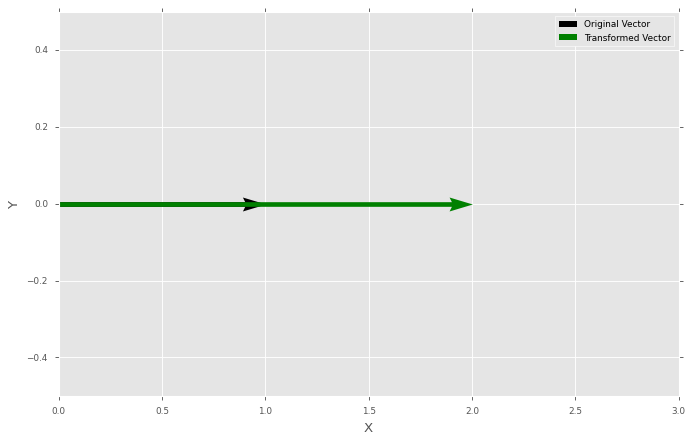

In [ ]:
x = np.array([[1], [0]])
b = np.dot(A, x)
plot_vect(x, b, (0, 3), (-0.5, 0.5))

With this new vector, the only change after the transformation is the length of the vector; it is stretched. The new vector is $[[2], [0]]$, therefore, the transform is

$$Ax = 2x$$

with $x = [[1], [0]]$ and $\lambda=2$. The direction of the vector does not change at all (no rotation).

####**15.1.3 The Characteristic Equation**

In order to get the eigenvalues and eigenvectors, from $Ax = λx$, we can use the following form:

$$(A - λI)x = 0,$$

where $I$ is the identify matrix with the same dimensions as $A$. If matrix $A − λI$ has an inverse and both sides are multiplied by $(A − λI)^{−1}$, we get a trivial solution $x = 0$. Therefore, the only interesting case is when $A − λI$ is singular (no inverse exists), and we have a nontrivial solution, which means that the determinant is zero:

$$det(A - λI) = 0.$$

This equation is called the **characteristic equation** that wil lead to a polynomial equation for $\lambda$, which we can solve for the eigenvalues.


###**15.2 THE POWER METHOD**

####**15.2.1 Finding the Largest Eigenvalue**

Some problems only require finding the largest dominant eigenvalue and its corresponding eigenvector. In this case, we can use the **power method**, which is an iterative method that will converge to the largest eigenvalue.

Consider an $n × n$ matrix $A$ that has $n$ real eigenvalues $λ_1, λ_2, ..., λ_n$ and the corresponding linearly
independent eigenvectors $v_1, v_2, ..., v_n$. Since the eigenvalues are scalars, we can rank them so that

$$|λ_1|> |λ_2| ≥, ...,≥ |λ_n|.$$

Note that we only rquire $|λ_1|> |λ_2|$; the other eigenvalues may be equal to each other.

**Note: Demonstration available in Notebook.**



**Try it**: We know from the last section that the largest eigenvalue is 4 for the matrix $A = \left[\begin{array}{cc}
0 & 2\\
2 & 3
\end{array}\right].$

Use the power method to find the largest eigenvalue and the associated eigenvector. You can use the initial vector $[1, 1]$ to start the iteration.

**First iteration:**

$$\left[\begin{array}{cc}
0 & 2\\
2 & 3
\end{array}\right]\left[\begin{array}{cc}
1\\
1
\end{array}\right] = \left[\begin{array}{cc}
2\\
5
\end{array}\right] = 5\left[\begin{array}{cc}
0.4\\
1
\end{array}\right].$$

**Second iteration:**

$$\left[\begin{array}{cc}
0 & 2\\
2 & 3
\end{array}\right]\left[\begin{array}{cc}
0.4\\
1
\end{array}\right] = \left[\begin{array}{cc}
2\\
3.8
\end{array}\right] = 3.8\left[\begin{array}{cc}
0.5263\\
1
\end{array}\right].$$

**Third iteration:**

$$\left[\begin{array}{cc}
0 & 2\\
2 & 3
\end{array}\right]\left[\begin{array}{cc}
0.5263\\
1
\end{array}\right] = \left[\begin{array}{cc}
2\\
4.0526
\end{array}\right] = 4.0526\left[\begin{array}{cc}
0.4935\\
1
\end{array}\right].$$

**Fourth iteration:**

$$\left[\begin{array}{cc}
0 & 2\\
2 & 3
\end{array}\right]\left[\begin{array}{cc}
0.4935\\
1
\end{array}\right] = \left[\begin{array}{cc}
2\\
3.987
\end{array}\right] = 3.987\left[\begin{array}{cc}
0.5016\\
1
\end{array}\right].$$

**Fifth iteration:**

$$\left[\begin{array}{cc}
0 & 2\\
2 & 3
\end{array}\right]\left[\begin{array}{cc}
0.5016\\
1
\end{array}\right] = \left[\begin{array}{cc}
2\\
4.0032
\end{array}\right] = 4.0032\left[\begin{array}{cc}
0.4996\\
1
\end{array}\right].$$

**Sixth iteration:**

$$\left[\begin{array}{cc}
0 & 2\\
2 & 3
\end{array}\right]\left[\begin{array}{cc}
0.4996\\
1
\end{array}\right] = \left[\begin{array}{cc}
2\\
3.9992
\end{array}\right] = 3.9992\left[\begin{array}{cc}
0.5001\\
1
\end{array}\right].$$

**Seventh iteration:**

$$\left[\begin{array}{cc}
0 & 2\\
2 & 3
\end{array}\right]\left[\begin{array}{cc}
0.5001\\
1
\end{array}\right] = \left[\begin{array}{cc}
2\\
4.0002
\end{array}\right] = 4.0002\left[\begin{array}{cc}
0.5000\\
1
\end{array}\right].$$

After seven iterations, the eigenvalue has converged to 4, with $[0.5, 1]$ as the corresponding eigenvector.

**Try it!**: implement the power methd in Python

In [ ]:
import numpy as np

def normalize(x):
  fac = abs(x).max()
  x_n = x/x.max()
  return fac, x_n

x_i = []
x = np.array([1, 1])
a = np.array([[0, 2],
              [2, 3]])

for i in range(10):
  x = np.dot(a, x)
  lambda_1, x = normalize(x)
  x_i.append(x)
print(f"Eigenvalue: {lambda_1}")
print(f"Eigenvector: {x}")
print(f"Eigenvectors for each iteration:\n{x_i}")

Eigenvalue: 3.999996821087633
Eigenvector: [0.5000004 1.       ]
Eigenvectors for each iteration:
[array([0.4, 1. ]), array([0.52631579, 1.        ]), array([0.49350649, 1.        ]), array([0.50162866, 1.        ]), array([0.49959317, 1.        ]), array([0.50010173, 1.        ]), array([0.49997457, 1.        ]), array([0.50000636, 1.        ]), array([0.49999841, 1.        ]), array([0.5000004, 1.       ])]


####**15.2.2 The Inverse Power Method**

The eigenvalues of the inverse matrix $A^{-1}$ are the reciprocals of the eigenvalues of $A$. By taking advantage of this feature, as well as the power method, we are able to obtain the smallest eigenvalue of $A$; this will be basis of the **inverse power method**. The steps are very simple: instead of applying $A$ as described above, we just apply $A^{-1}$ for aour iteration to find the largest value of $\frac{1}{\lambda_1}$, which will be the smallest value of the eigenvalues for $A$.

**Try it!**: Find the smallest eigenvalue and eigenvector for $A = \left[\begin{array}{cc}
0 & 2\\
2 & 3
\end{array}\right].$

In [ ]:
from numpy.linalg import inv
x_k = []
x = np.array([1, 1])
a = np.array([[0, 2],
              [2, 3]])

a_inv = inv(a)
for i in range(10):
  x = np.dot(a_inv, x)
  lambda_1, x = normalize(x)
  x_k.append(x)

print(f"Eigenvalue: {lambda_1}")
print(f"Eigenvector: {x}")
print(f"Eigenvectors for each iteration:\n{x_k}")

Eigenvalue: 1.9999570856379936
Eigenvector: [ 1.         -0.49999642]
Eigenvectors for each iteration:
[array([-0.5,  1. ]), array([ 1.        , -0.28571429]), array([-1.78571429,  1.        ]), array([ 1.        , -0.48543689]), array([-1.98543689,  1.        ]), array([ 1.        , -0.49908481]), array([-1.99908481,  1.        ]), array([ 1.        , -0.49994278]), array([-1.99994278,  1.        ]), array([ 1.        , -0.49999642])]


###**15.3 THE QR METHOD**

The **QR method** is the preferred iterative method to find all the eigenvalues of a matrix (but not the eigenvectors at the same time). The idea is based on the following two concepts:

1. Similar matrices will have the same eigenvalues and associated eigenvectors. Two square matrices $A$ and $B$ are similar if

$$A = C^{-1}B\space{C}$$

where $C$ is an invertible matrix.

2. The $QR$ method us a way to decompose a matrix into two matrices $Q$ and $R$, where $Q$ is an orthogonal matrix, and $R$ is an upper triangular matrix. An orthogonal matrix satisfies $Q^{-1} = Q^T$, which means $Q^{-1}Q = Q^TQ = I.$

How do we link these two concepts to find eigenvalues? Say, we have a matrix $A_0$ whose eigenvalues must be determined. At the $k$th step (starting with $k = 0$), we can perform the $QR$ decomposition and obtain

$$A_k = Q_kR_k$$

where $Q_k$ is an orthogonl matrix, and $R_K$ is an upper triangular matrix. We then form

$$A_{k+1} = R_kQ_k$$

to obtain

$$A_{k + 1} = R_kQ_k = Q^{-1}_kQ_kR_kQ_k = Q^{-1}_kA_kQ_k.$$

Because all the $A_k$ are similar, as we discussed above, they all have the same eigenvalues.

As the iteration continues, we will eventually converge to an upper triangular matrix with the form:

$$A_k = R_kQ_k = \left[\begin{array}{cc}
\lambda_1 & X & ... & X\\
0 & \lambda_2 & ... & X\\
. & . & . & .\\
. & . & . & .\\
. & . & . & .\\
0 & 0 & ... & \lambda_n\\
\end{array}\right],$$

where the diagonal values are the eigenvalues of the matrix. In each iteration of the QR method, factorig a matrix into an orthogonal and an upper triangular matrix can be done by using a special matrix called **Householder matrix**. We will use the Python function to obtain the two matrices directly.

**Try it!**: Use the `qr` function in `numpy.linalg` to decompose matrix $A = \left[\begin{array}{cc}
0 & 2\\
2 & 3
\end{array}\right].$ Verify the results.





In [ ]:
import numpy as np
#from numpy.linalg import qr

a = np.array([[0, 2],
              [2, 3]])

q, r = np.linalg.qr(a)

print(f"Q: {q}")
print(f"R: {r}")

b = np.dot(q, r)
print(f"QR: {b}")



Q: [[ 0. -1.]
 [-1.  0.]]
R: [[-2. -3.]
 [ 0. -2.]]
QR: [[0. 2.]
 [2. 3.]]


**Try it!**: Use the QR method to get the eigenvalues of matrix $A = \left[\begin{array}{cc}
0 & 2\\
2 & 3
\end{array}\right]$. Do 20 iterations, and print out the first, fifth, 10th, and 20th iteration.

In [ ]:
import numpy as np
from numpy.linalg import qr

a = np.array([[0, 2],
              [2, 3]])
p = [1, 5, 10, 20]

for i in range(20):
  q, r = qr(a)
  a = np.dot(r, q)
  if i + 1 in p:
    print(f"Iteration {i + 1}: ")
    print("--------------------")
    print(a)

Iteration 1: 
--------------------
[[3. 2.]
 [2. 0.]]
Iteration 5: 
--------------------
[[ 3.99998093  0.00976559]
 [ 0.00976559 -0.99998093]]
Iteration 10: 
--------------------
[[ 4.00000000e+00  9.53674316e-06]
 [ 9.53674316e-06 -1.00000000e+00]]
Iteration 20: 
--------------------
[[ 4.00000000e+00  9.09484250e-12]
 [ 9.09494702e-12 -1.00000000e+00]]


Note that after the ﬁfth iteration, the eigenvalues are converged to the correct ones. The next section will demonstrate how to obtain the eigenvalues and eigenvectors in Python using the built-in function.

###**15.4 EIGENVALUES AND EIGENVECTORS IN PYTHON**

The methods introduced above are fairly complicated to execute. The calculation of eigenvalues and eigenvectors in Python is fairly easy. The main built-in function in Python to solve the eigenvalue/eigenvector problem for a square array is the `eig` function in `numpy.linalg`; see below for an example in how to execute it.

**Try it!**: Calulate the igenvalues and eigenvectors for matrix $A = \left[\begin{array}{cc}
0 & 2\\
2 & 3
\end{array}\right].$


In [ ]:
import numpy as np
from numpy.linalg import eig

a = np.array([[0, 2],
              [2, 3]])
w, v = eig(a)
print(f"E-values: {w}")
print(f"E-vector: {v}")

E-values: [-1.  4.]
E-vector: [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


**Try it!**: Calulate the igenvalues and eigenvectors for matrix $A = \left[\begin{array}{cc}
2 & 2 & 4\\
1 & 3 & 5\\
2 & 3 & 4
\end{array}\right].$

In [ ]:
a = np.array([[2, 2, 4],
              [1, 3, 5],
              [2, 3, 4]])
w, v = eig(a)
print(f"E-values: {w}")
print(f"E-vector: {v}")

E-values: [ 8.80916362  0.92620912 -0.73537273]
E-vector: [[-0.52799324 -0.77557092 -0.36272811]
 [-0.604391    0.62277013 -0.7103262 ]
 [-0.59660259 -0.10318482  0.60321224]]


###**15.4 Summary and Problems**
---

1. Eigenvalues and eigenvectors help us understand the characteristics of a linear transformation.
2. Eigenvectors of a matrix are the vectors that can only be scaled lengthwise without rotation after applying the matrix transformation; the eigenvalues are the factors of the scaling.
3. We can use power method to get the largest eigenvalue and corresponding eigenvector of a matrix.
4. The inverse power method can help us get the smallest eigenvalue and corresponding eigenvector of a matrix.
5. The shifted power method can get all the other eigenvalues/eigenvectors of a matrix.
6. The preferred method to get all the eigenvalues is the QR method.
